#EDITED FROM PROF. B. AND COMPLETED BY DAYNAN CRULL
#Assignment 1:
    test if the distribution of ages is the same for 
    
    1) male and femal riders
    
    2) day and night riders
    
    use 3 tests: KS, Pearson's, Spearman's

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import json
import os
import csv
import urllib2
from zipfile import ZipFile
from StringIO import StringIO
%pylab inline

from __future__ import print_function
__author__='djc'

url = urllib2.urlopen("https://raw.githubusercontent.com/fedhere/PUI2015_fbianco/master/fbb_matplotlibrc.json")
s = json.load(url)
pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


/Users/Daynan/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


I will be using July 2015 data. - DJC

In [3]:
# pull from URL of Citibike zip file in GitHub repo and load as Pandas dataframe
zip_url = urllib2.urlopen("https://s3.amazonaws.com/tripdata/201507-citibike-tripdata.zip").read()
unzipped = ZipFile(StringIO(zip_url))
citibike_201507_csv = unzipped.open("201507-citibike-tripdata.csv")
df=pd.read_csv(citibike_201507_csv)
#df=pd.read_csv("201507-citibike-tripdata.csv")
print (df.columns)

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


#BY GENDER for July 2015 Data - DJC

In [4]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

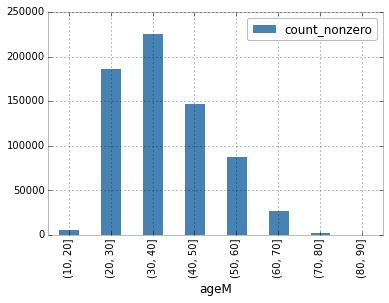

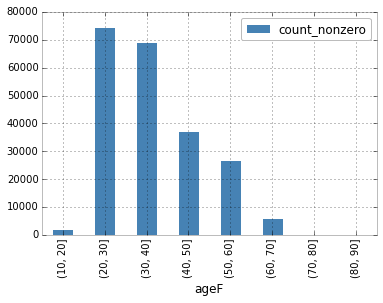

In [5]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 20]       0.000753
(20, 30]       0.072901
(30, 40]       0.063428
(40, 50]       0.020371
(50, 60]       0.014432
(60, 70]       0.002502
(70, 80]       0.000320
(80, 90]       0.000000


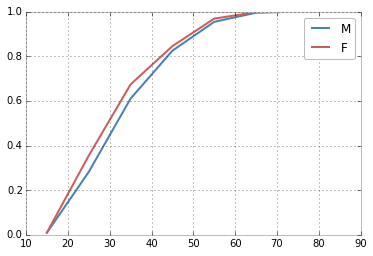

In [6]:
#print df.ageM, df.ageF.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

####Lets run the scipy KS test. Let's look at significance of alpha=0.05  - DJC

In [7]:
import scipy.stats

#KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

####NULL HYPOTHESIS: the two given samples share an identical distribution. Significance at alpha=0.05.

In [8]:
ks=scipy.stats.ks_2samp(df.ageM[~np.isnan(df.ageM)], df.ageF[~np.isnan(df.ageF)])
print (ks)

(0.085139370088744726, 0.0)


remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1+n2)}{n1n2}}$

where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/


In [9]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
#from IPython.display import Image
#Image(filename="ks2sample_table.png")
print ("for alpha values: c(alpha) :  0.10: 1.22;  0.05: 1.36;  0.025:1.48;  0.01: 1.63;  0.005: 1.73;  0.001:1.95")

for alpha values: c(alpha) :  0.10: 1.22;  0.05: 1.36;  0.025:1.48;  0.01: 1.63;  0.005: 1.73;  0.001:1.95


####Determine results of KS test.
We know from the p-value produced (0.0) that it is significant to the pre-set alpha of 0.05.

The Null is rejected.

But let's also examine KS metric manually. We'll do this at the interval of the bins for the sake of time, but it's probably better practice to find smaller increments. -- DJC

In [10]:
#re-state the KS metric - 
sample_maxes = np.abs(csM / csM.max()-csF / csF.max())
print (sample_maxes)
max_diff = float(sample_maxes.max())
print ("The max difference in 2 samples is: {0:.6f}".format(max_diff))

          count_nonzero
ageM                   
(10, 20]       0.000753
(20, 30]       0.072901
(30, 40]       0.063428
(40, 50]       0.020371
(50, 60]       0.014432
(60, 70]       0.002502
(70, 80]       0.000320
(80, 90]       0.000000
The max difference in 2 samples is: 0.072901


In [11]:
# calculate critical value
crit_value = 1.36
n_male = float(len(df.ageM[~np.isnan(df.ageM)]))
n_female = float(len(df.ageF[~np.isnan(df.ageF)]))
ks_formula = lambda v,n1,n2: v*(np.sqrt((n1+n2)/(n1*n2)))

ks_stat = ks_formula(crit_value,n_male,n_female)

def ks_results(m,ks):
    print("Is the max sample difference of {0:.6f} larger than the KS statistic of {1:.6f}?".format(m,ks))
    if m>ks:
        print ("Yes.")
    else:
        print ("Nope.")
    
    print ('The Null hypothesis is {}.'.format( 'rejected' if m>ks  else 'not rejected')) 

ks_results(max_diff,ks_stat)

Is the max sample difference of 0.072901 larger than the KS statistic of 0.003349?
Yes.
The Null hypothesis is rejected.


#Pearson's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



The Pearson test requires that the 2 samples be similar size. They are not when NaNs are removed, so we need to pull similar-sized samples from each population, which should be a random sampling. Given a large enough sample size, this should still be normally distributed and continue to satisfy the assumption for normal dist. that Pearson requires.

####Null hypothesis: the two given samples represent identical distributions as pulled from the same population. Signficance at alpha = 0.05.

In [12]:
# remove NaNs from both samples
dfm = df.ageM[~np.isnan(df.ageM)]
dff = df.ageF[~np.isnan(df.ageF)]
# import random and set the seed for reproducibility
import random
np.random.seed(32)
#set sample size (should be <= the smallest of the two samples)
size = 200000
dfm_rand = np.random.choice(dfm, size, replace=False)
dff_rand = np.random.choice(dff,size, replace=False)

In [13]:
# conducting Pearson's test
pearson1 = scipy.stats.pearsonr(dfm_rand, dff_rand)
pearson_alpha = 0.05

r,p = pearson1
def pearson_results(r,p,a):
    print("The Pearson r coefficient is {}. Is the 2-tailed p-value of {} smaller than {}?".format(r,p,a))
    if p<a:
        print ("Yes.")
    else:
        print ("Nope.")
    
    print ('The correlation is {} at the {} alpha level.'.format(('significant' if p<a  else 'not significant'),a)) 

pearson_results(r,p,pearson_alpha)

The Pearson r coefficient is 0.000610051934792. Is the 2-tailed p-value of 0.784990170738 smaller than 0.05?
Nope.
The correlation is not significant at the 0.05 alpha level.


At a nearly zero value correlation value, there appears very little difference, but at any rate, it is not significant. The Null is not rejected.

#Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

####Null hypothesis: the two given samples have identical distributions. Significance at alpha = 0.05.

In [14]:
# we'll use the same randomly-generated sample for consistency
spearman1 = scipy.stats.spearmanr(dfm_rand,dff_rand)
print (spearman1)
spearman_alpha = 0.05
sr,sp = spearman1
def spearman_results(r,p,a):
    print("The Spearman r coefficient is {}. Is the 2-tailed p-value of {} smaller than {}?".format(r,p,a))
    if p<a:
        print ("Yes.")
    else:
        print ("Nope.")
    
    print ('The correlation is {} at the {} alpha level.'.format(('significant' if p<a  else 'not significant'),a)) 

spearman_results(sr,sp,spearman_alpha)

(0.0011406909766525236, 0.60996074576013493)
The Spearman r coefficient is 0.00114069097665. Is the 2-tailed p-value of 0.60996074576 smaller than 0.05?
Nope.
The correlation is not significant at the 0.05 alpha level.


####Spearman test returns first a correlation coefficient and secondly, a pvalue. From our test, we see that the correlation is very close to 0, suggesting a very small difference. The pvalue is well above our significance level of 0.05, so the test is not significant anyway. The Null hypothesis is not rejected.

##DAY VS NIGHT-RIDERS

In [16]:
# running July 2015 data for day vs night: 6am to 8pm
df['hour'] = pd.DatetimeIndex(df.starttime).hour

In [18]:
df['day'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & ((df['hour'] < 20) & (df['hour']>6))]
df['night'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & ((df['hour'] >= 20) | (df['hour']<=6))]

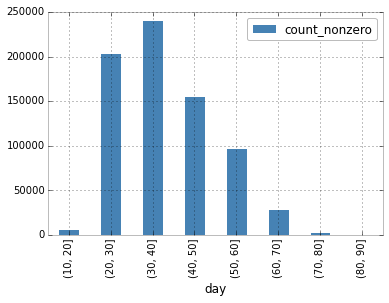

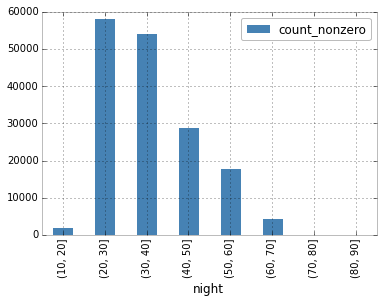

In [19]:
df.day.groupby(pd.cut(df.day, bins)).agg([count_nonzero]).plot(kind='bar')
df.night.groupby(pd.cut(df.night, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
day                    
(10, 20]       0.004181
(20, 30]       0.077792
(30, 40]       0.075847
(40, 50]       0.038400
(50, 60]       0.014592
(60, 70]       0.002677
(70, 80]       0.000021
(80, 90]       0.000000


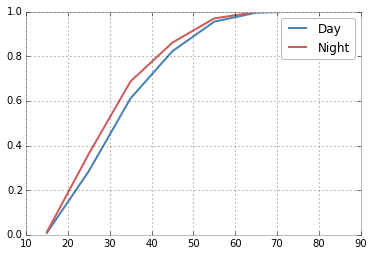

In [20]:
#print df.day, df.night.cumsum()

csD=df.day.groupby(pd.cut(df.day, bins)).agg([count_nonzero]).cumsum()

csN=df.night.groupby(pd.cut(df.night, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.legend()

In [21]:
ks=scipy.stats.ks_2samp(df.day[~np.isnan(df.day)], df.night[~np.isnan(df.night)])
print (ks)

(0.088777369613607604, 0.0)


####KS TEST NULL HYPOTHESIS: that the two samples (day and night) share an identical distribution of ages. Signficance at alpha=0.05.

In [24]:
#re-state the KS metric - 
day_sample_maxes = np.abs(csD / csD.max()-csN / csN.max())
print (day_sample_maxes)
day_max_diff = float(day_sample_maxes.max())
print ("The max difference in 2 samples is: {0:.6f}".format(day_max_diff))

          count_nonzero
day                    
(10, 20]       0.004181
(20, 30]       0.077792
(30, 40]       0.075847
(40, 50]       0.038400
(50, 60]       0.014592
(60, 70]       0.002677
(70, 80]       0.000021
(80, 90]       0.000000
The max difference in 2 samples is: 0.077792


In [25]:
# calculate critical value
crit_value = 1.36
n_day = float(len(df.day[~np.isnan(df.day)]))
n_night = float(len(df.night[~np.isnan(df.night)]))

#from above: ks_formula = lambda v,n1,n2: v*(np.sqrt((n1+n2)/(n1*n2)))

day_ks_stat = ks_formula(crit_value,n_day,n_night)

def ks_results(m,ks):
    print("Is the max sample difference of {0:.6f} larger than the KS statistic of {1:.6f}?".format(m,ks))
    if m>ks:
        print ("Yes.")
    else:
        print ("Nope.")
    
    print ('The Null hypothesis is {}.'.format( 'rejected' if m>ks  else 'not rejected')) 

ks_results(max_diff,day_ks_stat)

Is the max sample difference of 0.072901 larger than the KS statistic of 0.003687?
Yes.
The Null hypothesis is rejected.


##PEARSON

####Null hypothesis: the two samples (day and night) share identical distributions of age. Signficance at alpha = 0.05.

In [29]:
# remove NaNs from both samples
dfd = df.day[~np.isnan(df.day)]
dfn = df.night[~np.isnan(df.night)]
# import random and set the seed for reproducibility
import random
np.random.seed(32)
#set sample size (should be <= the smallest of the two samples)
size = (len(dfn))-1
dfd_rand = np.random.choice(dfd, size, replace=False)
dfn_rand = np.random.choice(dfn,size, replace=False)

In [30]:
# conducting Pearson's test
pearson_day = scipy.stats.pearsonr(dfd_rand, dfn_rand)

# from abovepearson_alpha = 0.05

r,p = pearson_day
def pearson_results(r,p,a):
    print("The Pearson r coefficient is {}. Is the 2-tailed p-value of {} smaller than {}?".format(r,p,a))
    if p<a:
        print ("Yes.")
    else:
        print ("Nope.")
    
    print ('The correlation is {} at the {} alpha level.'.format(('significant' if p<a  else 'not significant'),a)) 

pearson_results(r,p,pearson_alpha)

The Pearson r coefficient is 0.000407116240073. Is the 2-tailed p-value of 0.867950170953 smaller than 0.05?
Nope.
The correlation is not significant at the 0.05 alpha level.


The null hypothesis is not rejected for the Pearson test.

###Null hypothesis: the two samples (day and night) are identical distributions of age. Significance at alpha 0.05.

In [32]:
# we'll use the same randomly-generated sample for consistency
spearman_day = scipy.stats.spearmanr(dfd_rand,dfn_rand)
print (spearman_day)
# from above spearman_alpha = 0.05
sr,sp = spearman_day
def spearman_results(r,p,a):
    print("The Spearman r coefficient is {}. Is the 2-tailed p-value of {} smaller than {}?".format(r,p,a))
    if p<a:
        print ("Yes.")
    else:
        print ("Nope.")
    
    print ('The correlation is {} at the {} alpha level.'.format(('significant' if p<a  else 'not significant'),a)) 

spearman_results(sr,sp,spearman_alpha)

(-0.00069596980107109927, 0.77623559351164106)
The Spearman r coefficient is -0.000695969801071. Is the 2-tailed p-value of 0.776235593512 smaller than 0.05?
Nope.
The correlation is not significant at the 0.05 alpha level.


The null hypothesis is not rejected.